In [1]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

path='gdrive/MyDrive/evaluation InContextLearning2024'

import sys
sys.path.append('/content/'+path)


Mounted at /content/gdrive


In [2]:
%cd 'evaluation InContextLearning2024'

[Errno 2] No such file or directory: 'evaluation InContextLearning2024'
/content


In [9]:
! ls

environment.yaml  src


In [1]:
from eval.eval import basic_eval
from models.linear import LeastSquaresModel
from models.zero_model import ZeroModel
from function_classes.linear import LinearRegression

from torch.distributions.normal import Normal
import torch

from torch import nn


from torch import normal

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
m = Normal(torch.zeros((4, 100, 10)), torch.ones((4, 100 ,10))) #batch size, sequence_length, x_dim

config_data={'function_class':LinearRegression(m), "accuracy_func": nn.MSELoss(reduction="none"), "samples": 10, "seq_length": 100, "batch_size": 4}

evaluation=basic_eval(LeastSquaresModel(), config_data)

print(basic_eval(ZeroModel(), config_data))

{'accuracy': tensor([1138.0715,  541.8765, 1263.0906,  835.7742,  609.2230,  753.9652,
        1404.0629, 1194.5839,  640.3401,  896.9938, 1073.2200, 1257.6205,
         470.3566,  862.7321,  943.9199, 1025.8069,  978.2416,  973.5218,
         820.3380,  809.4067,  887.2513,  818.7598,  665.9779,  676.8068,
         874.7832,  486.5448, 1040.8273, 1048.3219,  802.1714,  980.6024,
         755.2433, 1120.4612,  736.8869,  757.6512,  872.8102, 1028.9333,
         888.0311,  822.7334, 1243.4884,  919.3926,  963.7967,  835.7228,
         782.7622,  765.0085,  764.8940, 1116.2996,  850.3364,  993.7988,
         524.0968, 1333.3024, 1483.4045,  773.8596,  587.5413,  669.5507,
        1077.7114, 1032.4863,  989.7593, 1129.4281,  716.2015, 1041.5879,
         587.6613, 1158.1965, 1169.8370,  703.6488, 1124.7095,  900.1040,
        1110.5615,  495.2148,  707.7269,  877.5870, 1087.6414, 1182.0503,
         714.0458,  813.9545, 1199.3578,  801.4514,  746.9366, 1002.3294,
        1615.8459,  880.6

dict_keys(['accuracy', 'std', 'std_mean', 'max', 'min', 'quantile0.01', 'quantile0.05', 'quantile0.1', 'quantile0.25', 'quantile0.5', 'quantile0.75', 'quantile0.9', 'quantile0.95', 'quantile0.99'])


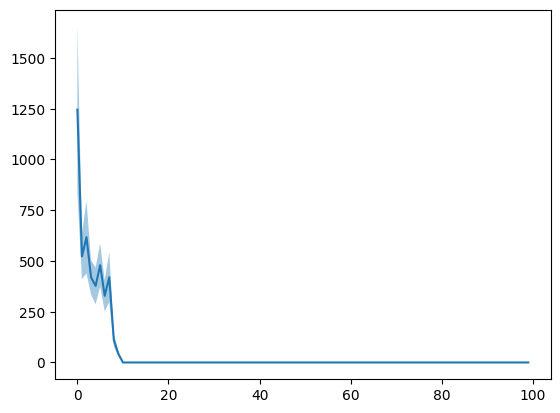

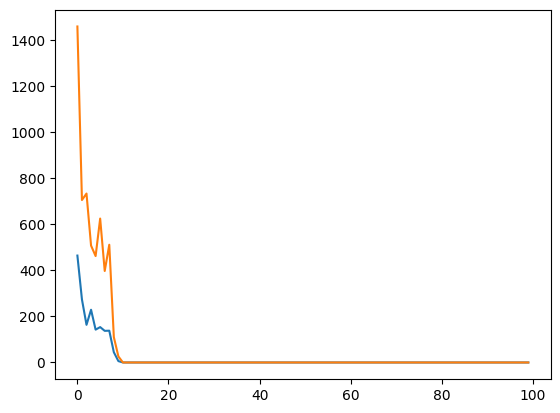

In [9]:
import matplotlib.pyplot as plt

import numpy as np

print(evaluation.keys())

plt.plot(evaluation.get("accuracy"))

plt.fill_between(range(len(evaluation.get("accuracy"))), evaluation.get("accuracy")-evaluation.get("std_mean"), evaluation.get("accuracy")+evaluation.get("std_mean"), alpha=0.4)

plt.show()

plt.plot(evaluation.get("quantile0.5") )

plt.plot(evaluation.get("quantile0.75"))